In [1]:
import pandas as pd
import os
from alchemlyb.parsing import amber
from alchemlyb.estimators import TI,MBAR

In [2]:
# repate number
round_NO = 1
# restraint constant
k_dist=10
k_ang=100
k_rotate=100

In [3]:
top_dir = os.getcwd()
os.chdir(f'./complex_{round_NO}_{k_dist}_{k_ang}_{k_rotate}/ligand_one_step')
main_dir = os.getcwd()
file_list = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

In [4]:
dHdl = pd.concat([amber.extract_dHdl(str(filename) + '/ti001.out', T=300) for filename in file_list])
u_nk_rm_rest = pd.concat([amber.extract_u_nk(str(filename) + '/ti001.out', T=300) for filename in file_list])

/home1/wsp/anaconda3/envs/alchemlyb/lib/python3.10/site-packages/alchemlyb/parsing/amber.py:39: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  index=pd.Float64Index(data_dic["time"], name='time'))
/home1/wsp/anaconda3/envs/alchemlyb/lib/python3.10/site-packages/alchemlyb/parsing/amber.py:39: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  index=pd.Float64Index(data_dic["time"], name='time'))
/home1/wsp/anaconda3/envs/alchemlyb/lib/python3.10/site-packages/alchemlyb/parsing/amber.py:39: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  index=pd.Float64Index(data_dic["time"], name='time'))
/home1/wsp/anaconda3/envs/alchemlyb/lib/python3.10/site-packages/alchemlyb/pars

In [5]:
ti_estimator = TI().fit(dHdl)
mbar_estimator = MBAR().fit(u_nk_rm_rest)

In [6]:
delta_f = ti_estimator.delta_f_.iloc[0, -1]
d_delta_f = ti_estimator.d_delta_f_.iloc[0, -1]

In [7]:
print("TI:")
print("Free energy difference (TI)", delta_f, "kT")
print("Free energy difference (TI) error", d_delta_f, "kT")

TI:
Free energy difference (TI) 37.432876366174476 kT
Free energy difference (TI) error 0.19606774767708282 kT


Free energy difference (MBAR) 37.3282443039009 kT


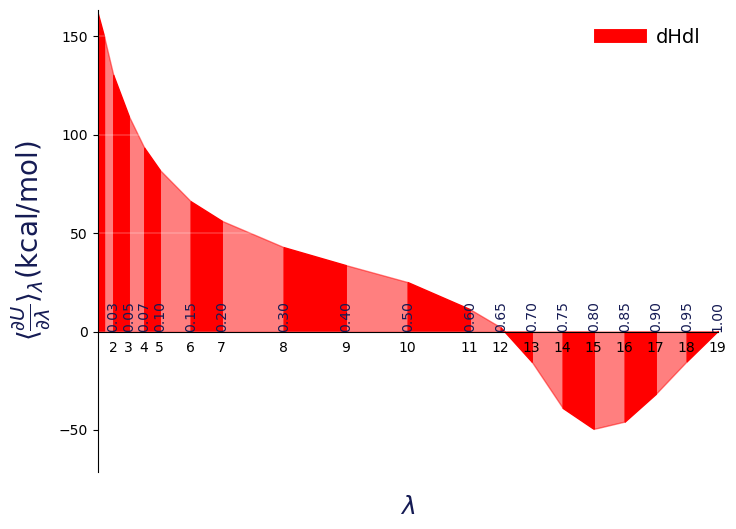

In [8]:
print("Free energy difference (MBAR)", mbar_estimator.delta_f_.loc[0.0, 1.0],'kT')
from alchemlyb.visualisation import plot_ti_dhdl,plot_mbar_overlap_matrix
ax = plot_ti_dhdl([ti_estimator], labels=['dHdl'], colors=['r'],units='kcal/mol')
ax.figure.savefig('onestep_dhdl_TI.pdf')

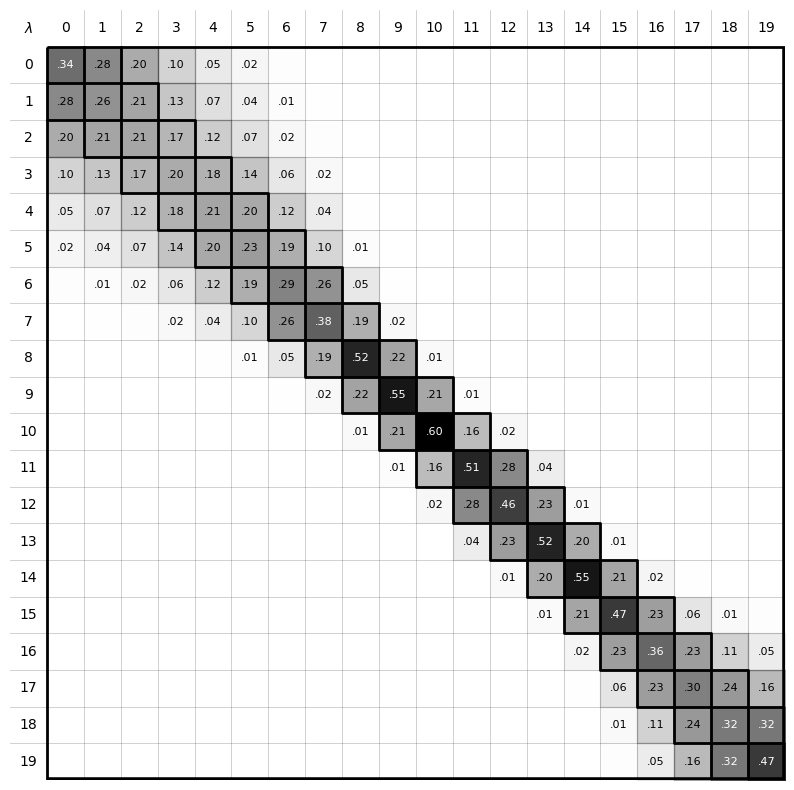

In [9]:
ax = plot_mbar_overlap_matrix(mbar_estimator.overlap_matrix)
ax.figure.savefig('onestep_MBAR.pdf', bbox_inches='tight', pad_inches=0.0)

In [10]:
import matplotlib.pyplot as plt
from alchemlyb.visualisation.dF_state import plot_dF_state

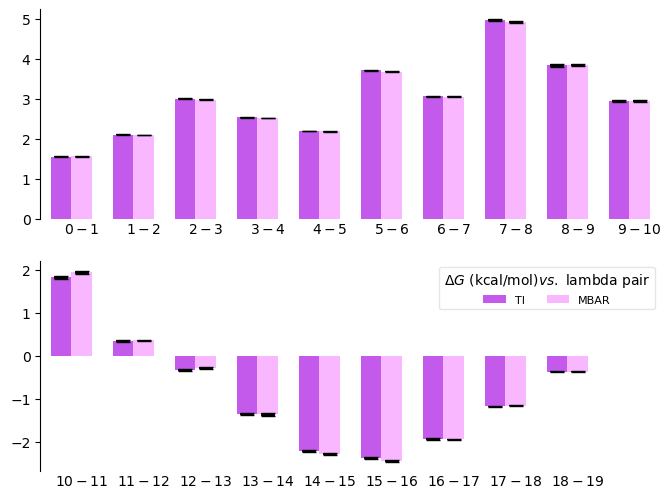

In [17]:
estimators = [(ti_estimator), (mbar_estimator)]

fig = plot_dF_state(estimators, orientation='portrait',units='kcal/mol')
fig.savefig('dF_state.pdf', bbox_inches='tight')

with open(f'{main_dir}/result.txt','w') as f:
    f.write(f'Free energy difference (TI):\t{delta_f * 0.596:0.3f} ± {d_delta_f * 0.596:0.3f} kcal/mol\n')
    f.write(f'Free energy difference (MBAR):\t{mbar_estimator.delta_f_.loc[0.0,1.0] * 0.596:0.3f} ± {mbar_estimator.d_delta_f_.loc[0.0,1.0] * 0.596:0.3f} kcal/mol\n')
    for i in range(len(file_list)-1):
        f.writelines(f'{mbar_estimator.delta_f_.loc[file_list[i],file_list[i+1]] * 0.596:.3f}\n')

with open(f'{top_dir}/summary_ABFE.txt','a') as f:
    f.write('ligand decouple from solvent\n')
    f.write(f'\tMBAR:\t{mbar_estimator.delta_f_.loc[0.0,1.0] * 0.596:0.3f} \t± {mbar_estimator.d_delta_f_.loc[0.0,1.0] * 0.596:0.3f}\tTi:\t{delta_f * 0.596:0.3f} \t± {d_delta_f * 0.596:0.3f}\tkcal/mol\n')

In [12]:
delta_f

37.432876366174476

In [13]:
type(ti_estimator.delta_f_.iloc[0, -1])

numpy.float64

In [14]:
ti_estimator.delta_f_

,0.000,0.010,0.025,0.050,0.075,0.100,0.150,0.200,0.300,0.400,0.500,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000
0.000,0.000000,2.617940,6.149831,11.183909,15.441442,19.123935,25.346762,30.484071,38.802131,45.230659,50.168094,53.230214,53.797351,53.242491,50.969644,47.264182,43.268822,40.019746,38.055545,37.432876
0.010,-2.617940,0.000000,3.531892,8.565970,12.823502,16.505995,22.728822,27.866131,36.184191,42.612719,47.550155,50.612274,51.179411,50.624551,48.351705,44.646243,40.650883,37.401807,35.437605,34.814937
0.025,-6.149831,-3.531892,0.000000,5.034078,9.291610,12.974103,19.196930,24.334239,32.652299,39.080827,44.018263,47.080383,47.647520,47.092660,44.819813,41.114351,37.118991,33.869915,31.905713,31.283045
0.050,-11.183909,-8.565970,-5.034078,0.000000,4.257533,7.940025,14.162853,19.300161,27.618222,34.046750,38.984185,42.046305,42.613442,42.058582,39.785735,36.080273,32.084913,28.835837,26.871635,26.248967
0.075,-15.441442,-12.823502,-9.291610,-4.257533,0.000000,3.682493,9.905320,15.042629,23.360689,29.789217,34.726652,37.788772,38.355909,37.801049,35.528202,31.822740,27.827380,24.578304,22.614103,21.991435
0.100,-19.123935,-16.505995,-12.974103,-7.940025,-3.682493,0.000000,6.222827,11.360136,19.678196,26.106724,31.044160,34.106279,34.673416,34.118556,31.845710,28.140248,24.144888,20.895812,18.931610,18.308942
0.150,-25.346762,-22.728822,-19.196930,-14.162853,-9.905320,-6.222827,0.000000,5.137309,13.455369,19.883897,24.821332,27.883452,28.450589,27.895729,25.622882,21.917420,17.922060,14.672984,12.708783,12.086115
0.200,-30.484071,-27.866131,-24.334239,-19.300161,-15.042629,-11.360136,-5.137309,0.000000,8.318060,14.746588,19.684024,22.746143,23.313280,22.758420,20.485574,16.780112,12.784752,9.535676,7.571474,6.948806
0.300,-38.802131,-36.184191,-32.652299,-27.618222,-23.360689,-19.678196,-13.455369,-8.318060,0.000000,6.428528,11.365964,14.428083,14.995220,14.440360,12.167513,8.462051,4.466691,1.217616,-0.746586,-1.369254
0.400,-45.230659,-42.612719,-39.080827,-34.046750,-29.789217,-26.106724,-19.883897,-14.746588,-6.428528,0.000000,4.937435,7.999555,8.566692,8.011832,5.738985,2.033523,-1.961837,-5.210913,-7.175114,-7.797782


In [15]:
mbar_estimator.delta_f_

,0.000,0.010,0.025,0.050,0.075,0.100,0.150,0.200,0.300,0.400,0.500,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000
0.000,0.000000,2.623276,6.135804,11.140062,15.368217,19.037313,25.209777,30.324740,38.573335,45.026339,49.955233,53.216801,53.818911,53.349206,51.063442,47.239510,43.145456,39.898447,37.946494,37.328244
0.010,-2.623276,0.000000,3.512528,8.516786,12.744941,16.414037,22.586501,27.701464,35.950059,42.403063,47.331956,50.593525,51.195635,50.725930,48.440165,44.616233,40.522180,37.275171,35.323218,34.704968
0.025,-6.135804,-3.512528,0.000000,5.004258,9.232413,12.901509,19.073973,24.188936,32.437531,38.890535,43.819429,47.080997,47.683107,47.213402,44.927638,41.103706,37.009652,33.762643,31.810690,31.192440
0.050,-11.140062,-8.516786,-5.004258,0.000000,4.228155,7.897251,14.069715,19.184678,27.433273,33.886276,38.815170,42.076739,42.678849,42.209144,39.923379,36.099447,32.005393,28.758385,26.806432,26.188182
0.075,-15.368217,-12.744941,-9.232413,-4.228155,0.000000,3.669096,9.841560,14.956523,23.205118,29.658122,34.587016,37.848584,38.450694,37.980989,35.695225,31.871293,27.777239,24.530230,22.578277,21.960027
0.100,-19.037313,-16.414037,-12.901509,-7.897251,-3.669096,0.000000,6.172464,11.287427,19.536022,25.989026,30.917920,34.179488,34.781598,34.311893,32.026129,28.202197,24.108143,20.861134,18.909181,18.290931
0.150,-25.209777,-22.586501,-19.073973,-14.069715,-9.841560,-6.172464,0.000000,5.114963,13.363558,19.816562,24.745456,28.007024,28.609134,28.139429,25.853665,22.029733,17.935679,14.688670,12.736717,12.118467
0.200,-30.324740,-27.701464,-24.188936,-19.184678,-14.956523,-11.287427,-5.114963,0.000000,8.248595,14.701599,19.630493,22.892061,23.494171,23.024466,20.738702,16.914770,12.820716,9.573707,7.621754,7.003504
0.300,-38.573335,-35.950059,-32.437531,-27.433273,-23.205118,-19.536022,-13.363558,-8.248595,0.000000,6.453004,11.381898,14.643466,15.245576,14.775871,12.490107,8.666175,4.572121,1.325112,-0.626841,-1.245091
0.400,-45.026339,-42.403063,-38.890535,-33.886276,-29.658122,-25.989026,-19.816562,-14.701599,-6.453004,0.000000,4.928894,8.190462,8.792572,8.322867,6.037103,2.213171,-1.880883,-5.127892,-7.079845,-7.698095


In [16]:
mbar_estimator.delta_f_.iloc[0,-1] * 0.6

22.39694658234054